## Inverse transform method

Let $\xi$ ~ $U[0,1]$. $F$ - continuous CDF, so that $\exists~F^{-1}$ and: $$P(F^{-1}(\xi) \le x) = P(F(F^{-1}(\xi)) \le F(x)) = P(\xi \le F(x)) = F_\xi(F(x)) = F(x)$$
Or we can define $F^{-1}(y)$ as  $inf\{x: F(x) \geqslant y\}$ so that $F$ could be any

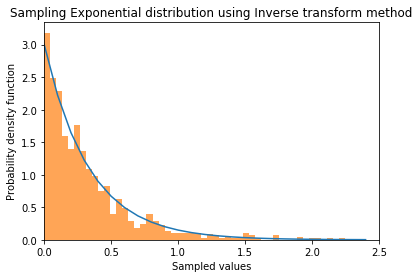

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lmbd = 3
expsamp = - np.log((np.random.uniform(0, 1, 1000)))/lmbd  #1-U ~ U, where U is uniformly distributed
t = np.arange(0.0, 2.5, 0.1)

plt.plot(t, lmbd * np.exp(-lmbd * t))
plt.hist(expsamp, bins = 50, density = True, alpha = 0.7)
plt.xlabel('Sampled values')
plt.ylabel('Probability density function')
plt.title('Sampling Exponential distribution using Inverse transform method')
plt.xlim(0.0, 2.5)
plt.show()

## Rejection sampling (Accept-reject method)

We must show that the conditional distribution of $Y$ given that $U \leqslant \frac{f(Y)}{cg(Y)}$, is indeed $F$; that is, that $P(Y \leqslant y \mid U \leqslant \frac{f(Y)}{cg(Y)})=F(y)$. Letting $B=\{U \leqslant \frac{f(Y)}{cg(Y)}\}$, $A=\{Y \leqslant y\}$, recalling that $P(B)=p=1/c$, and then using the basic fact that $P(A \mid B)=P(B \mid A)P(A)/P(B)$ yields
$$P(U \leqslant \frac{f(Y)}{cg(Y)} \mid Y \leqslant y) \times \frac{G(y)}{1/c} = \frac{F(y)}{cG(y)} \times \frac{G(y)}{1/c} = F(y)$$ where we used the following computation: $$P(U \leqslant \frac{f(Y)}{cg(Y)} \mid Y \leqslant y) = \frac{P(U \leqslant \frac{f(Y)}{cg(Y)}, Y \leqslant y)}{G(y)} = \int_{-\infty}^y\frac{P(U \leqslant \frac{f(Y)}{cg(Y)} \mid Y = w \leqslant y)}{G(y)}g(w)\,dw = \frac{1}{G(y)}\int_{-\infty}^y\frac{f(w)}{cg(w)}g(w)\,dw = $$ $$=\frac{1}{cG(y)}\int_{-\infty}^yf(w)\,dw = \frac{F(y)}{cG(y)}$$

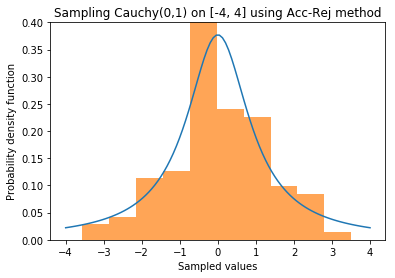

In [3]:
from scipy import stats, integrate
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)

norm, err = integrate.quad(lambda x: dist.pdf(x), -4, 4)    #normalizing bounded cauchy pdf
plt.plot(x, dist.pdf(x)/norm)

cmax = dist.pdf(x).max()/norm    #we want to envelop our pdf with uniform pdf
propsamp = np.random.uniform(-4, 4, 100)    #starting sampling
accepted = propsamp[np.random.uniform(0, cmax, 100) < dist.pdf(propsamp)/norm]
totalacc = accepted    #will be adding to this array to make it 100-sized sample

nacc = accepted.size    #100 samples needed
while nacc < 100:
    xsamp = np.random.uniform(-4, 4)
    if (np.random.uniform(0, cmax) < dist.pdf(xsamp)/norm):
        totalacc = np.append(totalacc, xsamp)
        nacc += 1
plt.hist(totalacc, density = True, alpha = 0.7)

plt.ylim(0, 0.4)
plt.xlabel('Sampled values')
plt.ylabel('Probability density function')
plt.title('Sampling Cauchy(0,1) on [-4, 4] using Acc-Rej method')
plt.show()

## Coordinate transformation

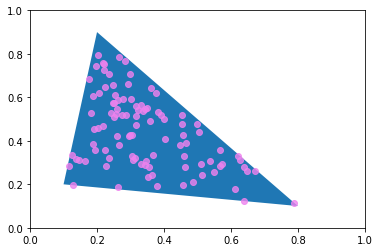

In [4]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

x0 = np.random.uniform(0, 1, 200)  #uniform distribution 
y0 = np.random.uniform(0, 1, 200)  #on a 1x1 square 

x = x0[y0 < 1 - x0]  #we want to map lower triangle (0,0), (0,1), (1,0)
y = y0[y0 < 1 - x0]  #into a given triangle (these are our starting points)
n = x.size

while (n < 100):     #we need a 100-sized sample; just in case starting points aren't enough
    z = np.random.uniform(0, 1)
    w = np.random.uniform(0, 1)
    if (w < 1 - z):
        x = np.append(x, z)
        y = np.append(y, w)
        n += 1

x1 = 0.7 * x + 0.1 * y + 0.1    #needed linear 
y1 = -0.1 * x + 0.7 * y + 0.2   #transformation

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

plt.scatter(x1[:100], y1[:100], color = 'violet', alpha = 0.8)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()

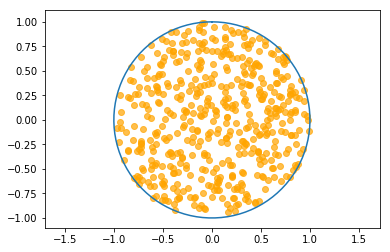

In [5]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

alpha = np.random.uniform(0, 2 * np.pi, 500)
r = np.sqrt(np.random.uniform(0, 1, 500))   #using sqrt(uniform) because pdf depends linearly on r
x = np.cos(alpha) * r
y = np.sin(alpha) * r

plt.scatter(x, y, c = 'orange', alpha = 0.7)
plt.show()

## Random normal generator

If $(X, Y )$ is a pair of independent standard normals, then the probability density is a product:
$$f(x,y)=\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\times\frac{1}{\sqrt{2\pi}}e^{-y^{2}/2}=\frac{1}{2\pi}e^{-(x^2+y^2)/2}$$
Since this density is radially symmetric, it is natural to consider the polar coordinate random variables $(R, \Theta)$ defined by $0 \leqslant \Theta <2\pi$ and $X = R \cos(\Theta)$, and $Y = R \sin(\Theta)$. Clearly $\Theta$ is uniformly distributed in the interval $[0, 2\pi]$ and
may be sampled using $$\Theta = 2\pi U_1$$
Unlike the original distribution function, there is a simple expression for the $R$ distribution function:
$$G(r)=P(R\leqslant r)=\int_0^r\int_0^{2\pi}\frac{1}{2\pi}e^{-r'^2/2}r'dr'd\theta=\int_0^r e^{-r'^2/2}r'dr'=1-e^{-r^2/2}$$
Therefore, we can sample R using Inverse transform method: $$R=\sqrt{-2\ln{U_2}}$$
And so, our $X = R \cos(\Theta) = \sqrt{-2\ln{U_2}} \cos(2\pi U_1)$  and  $Y = R \sin(\Theta) = \sqrt{-2\ln{U_2}} \sin(2\pi U_1)$ are independent standart normals. $$$$ 
We can adjust this algorithm by using Acceptance-Rejection method as follows: let $U$ and $V$ be of $U[-1, 1]$ distribution. That means we have a uniform distribution on a unit square, so we can sample a uniform distribution on a unit circle inside this square taking $(u,v)$ points, which satisfy $u^2+v^2\leqslant 1$. Then, we can calculate $\cos(\theta)$ and $\sin(\theta)$ as $\frac{u}{R}$ and $\frac{v}{R}$ respectively, where $R=\sqrt{u^2+v^2}$, for the point $(R, \theta)$ in polar coordinates.

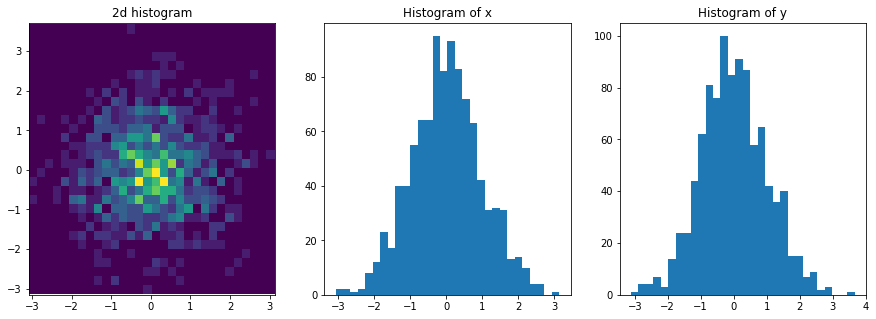

0.010398426239538553


In [6]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
print(np.corrcoef(x, y)[0,1])#we can assure, that X and Y are somewhat independent, computing numerically their correlation

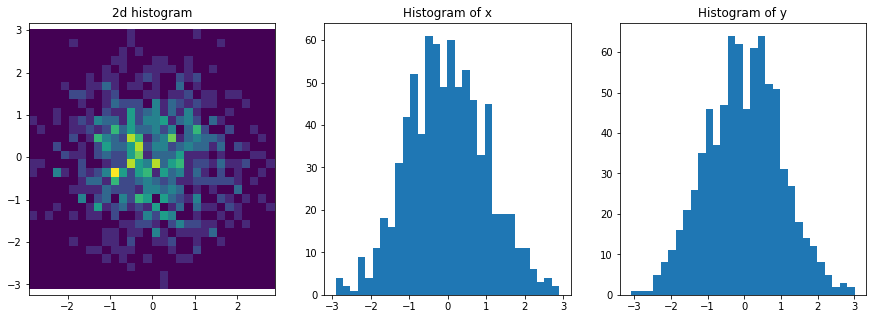

-0.04722278943713909

In [7]:
n = 1000
u0 = np.random.uniform(-1, 1, n)
v0 = np.random.uniform(-1, 1, n)
u = u0[u0**2 + v0**2 <= 1]
v = v0[u0**2 + v0**2 <= 1]
R = u**2 + v**2
x = np.sqrt(-2 * np.log(R)) * (u/np.sqrt(R))
y = np.sqrt(-2 * np.log(R)) * (v/np.sqrt(R))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
np.corrcoef(x, y)[0,1]

## Markov Chain Monte Carlo (MCMC)

In [10]:
from scipy.stats import norm

np.random.seed(123)
data = np.random.randn(20)

mu_prior_mu = 0
mu_prior_sd = 1

def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

x = np.linspace(-1, 1, 100)
posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)

mu_current = 1
proposal_width = .1
mu_proposal = norm(mu_current, proposal_width).rvs()

likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

# Compute prior probability of current and proposed mu
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal

p_accept = min(1, p_proposal / p_current)

accept = np.random.rand() < p_accept

if accept:
    mu_current = mu_proposal